# Credit Card Application Approval Prediction

## Project description

The goal is to predict whether applicant will have their credit card application approved:

- GENDER
- Car_Owner
- Propert_Owner
- CHILDREN
- Annual_income
- Type_Income
- EDUCATION
- Marital_status
- Housing_type
- Birthday_count
- Employed_days
- Mobile_phone
- Work_Phone
- Phone
- EMAIL_ID
- Type_Occupation
- Family_Members

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Import data

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Exploring the data

/var/folders/0n/3jh9862d73j9wkdg1y54jxf80000gn/T/ipykernel_46663/3605390533.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

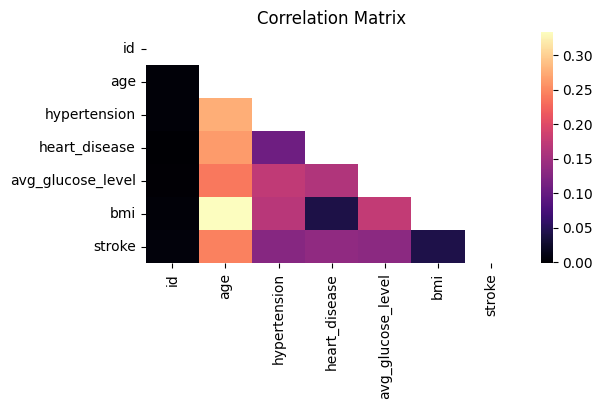

In [3]:
corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(6, 3))
sb.heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

corr_matrix['stroke'].sort_values(ascending=False)  

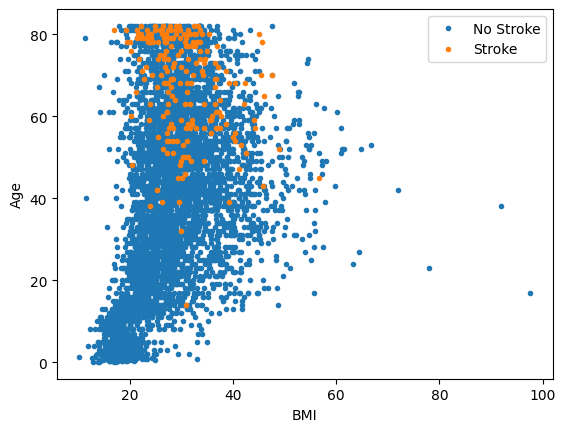

In [4]:
def plot_scatter_with_labels(X1, X2, Y, xlabel='BMI', ylabel='Age'):
  df = pd.DataFrame(dict(x1=X1, x2=X2, label=Y))
  groups = df.groupby('label')
  for number, group in groups:
    if number == 0:
      name = 'No Stroke'
    elif number == 1:
      name = 'Stroke'
    plt.plot(group.x1, group.x2, marker='o', linestyle='', ms=3, label=name)

  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

plot_scatter_with_labels(data['bmi'], data['age'], data['stroke'])

### Gender distribution

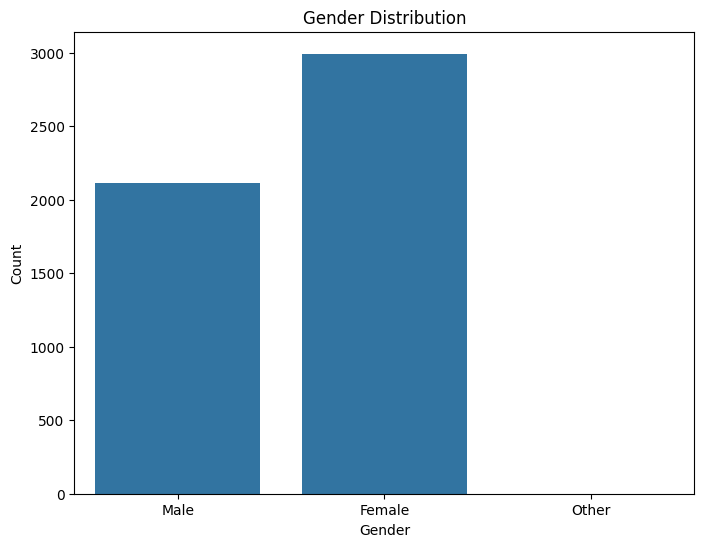

In [5]:
plt.figure(figsize=(8, 6))
sb.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Age distribution

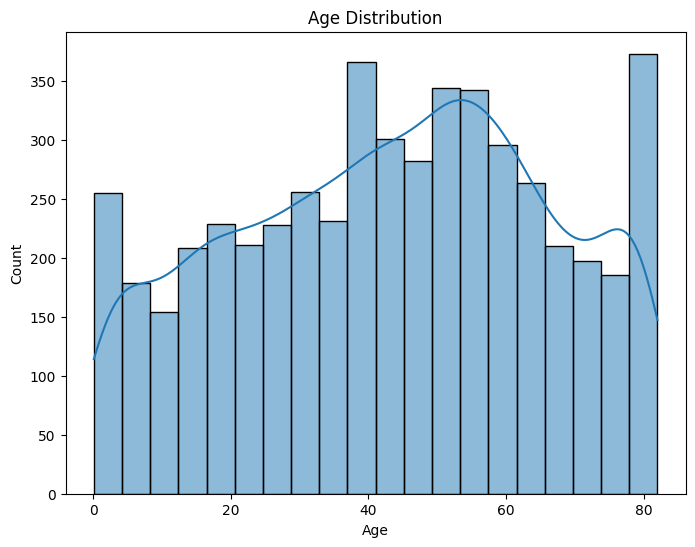

In [6]:
plt.figure(figsize=(8, 6))
sb.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Hypertension and heart disease

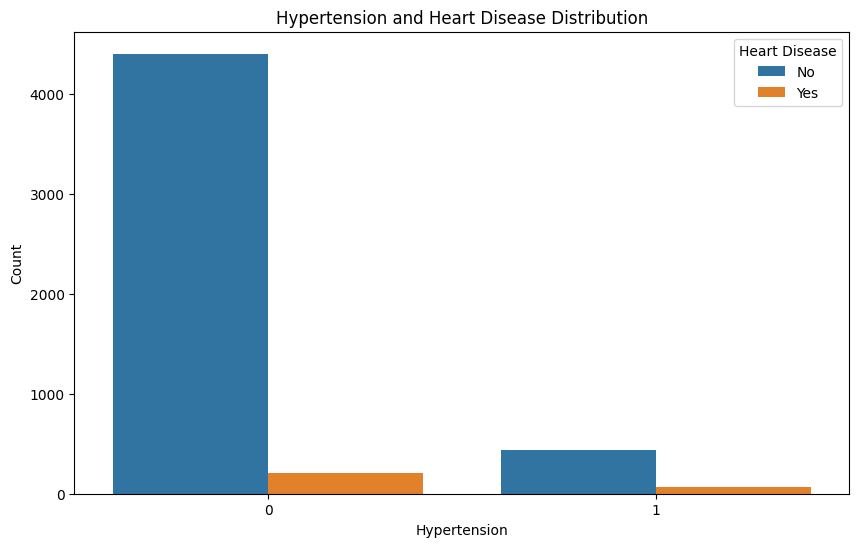

In [7]:
plt.figure(figsize=(10, 6))
sb.countplot(x='hypertension', hue='heart_disease', data=data)
plt.title('Hypertension and Heart Disease Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### Glucose level and BMI

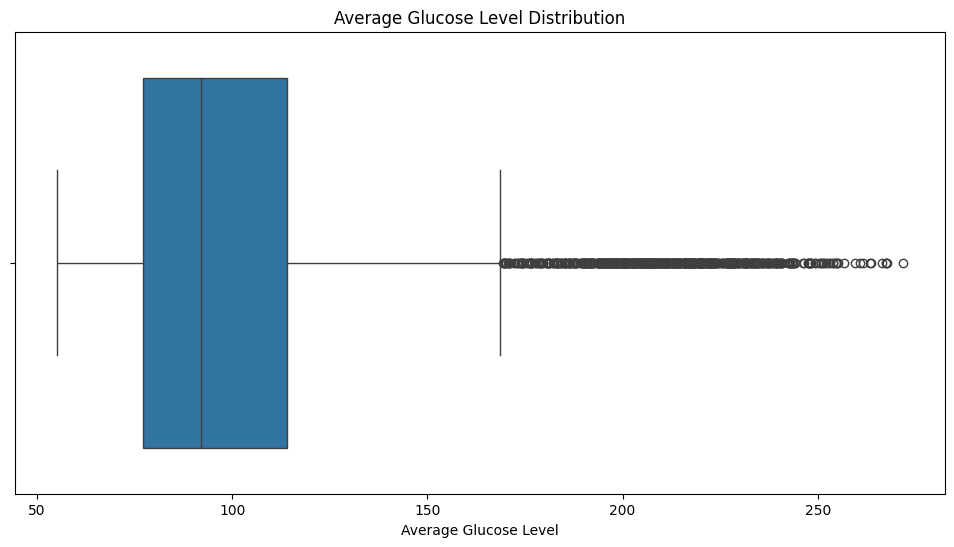

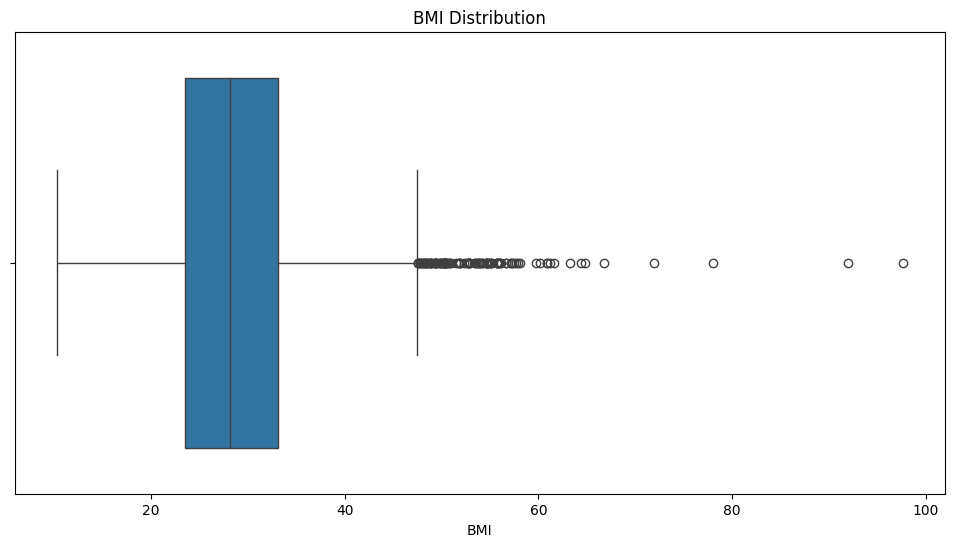

In [8]:
plt.figure(figsize=(12, 6))
sb.boxplot(x='avg_glucose_level', data=data)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.show()

plt.figure(figsize=(12, 6))
sb.boxplot(x='bmi', data=data)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

### Smoking status distribution

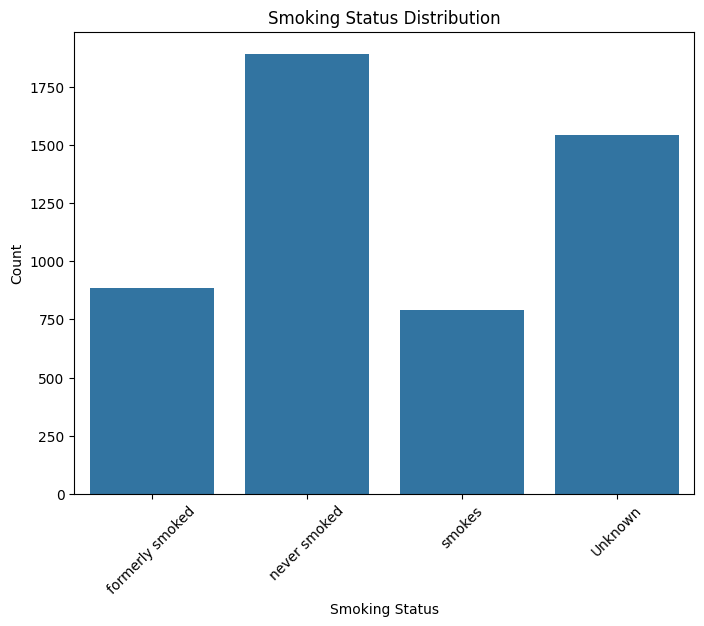

In [9]:
plt.figure(figsize=(8, 6))
sb.countplot(x='smoking_status', data=data)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Stroke distribution

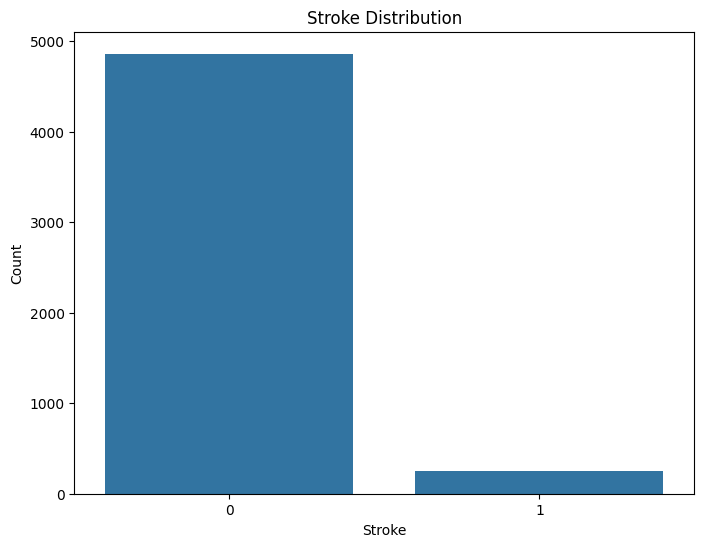

In [10]:
plt.figure(figsize=(8, 6))
sb.countplot(x='stroke', data=data)
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

## Convert categorical data to numerical

In the data there are 5 columns with the catergorical values that need to be converted to numerical values.

- gender
- ever_married
- work_type
- Residence_type
- smoking_status

Additionally, there are 201 null cells in the "bmi" column that need to be converted.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Convert the "gender" column

In [12]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
genders = {'Male':0, 'Female':1, 'Other':2}
data['gender'] = data['gender'].map(genders)

### Convert the "ever_married" column

In [14]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
married_status = {'No':0, 'Yes':1}
data['ever_married'] = data['ever_married'].map(married_status)

### Convert the "work_type" column

In [16]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
work_types = {'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}
data['work_type'] = data['work_type'].map(work_types)

### Convert the "Residence_type" column

In [18]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [19]:
residence_types = {'Urban':0, 'Rural':1}
data['Residence_type'] = data['Residence_type'].map(residence_types)

### Convert the "smoking_status" column

In [20]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [21]:
smoking_statuses = {'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}
data['smoking_status'] = data['smoking_status'].map(smoking_statuses)

### Convert nulls in the "bmi" column

In [22]:
print("Before:")
data['bmi'].head()

Before:


0    36.6
1     NaN
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

In [23]:
# convert null values to mean of non-nulls
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

print("After:")
data['bmi'].head()

After:


0    36.600000
1    28.893237
2    32.500000
3    34.400000
4    24.000000
Name: bmi, dtype: float64

### Re-check dataset to verify changes

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


## Split data into training and testing sets

### SVM-linear

### SVM-nonlinear (RBF and POLY kernels)

## Reference

Dataset from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset